# Pendulum

## References
* https://en.wikipedia.org/wiki/Pendulum
* https://en.wikipedia.org/wiki/Pendulum_(mathematics)

## Introduction
**Fix me if you find any typo!**

The equation of motions of a pendulum reads

$$
  \frac{d^2 \theta}{dt^2} = \ddot{\theta} = -\omega^2_0 \sin(\theta),
$$
where $\omega^2=g/L$. If this work you will take $g=9.8 \text{m}/\text{s}^2$ and $L=1$ m.

When the amplitude of the motion is small, one has $\sin\theta \approx \theta$ 
and the period is given by $\tau \approx \frac{2\pi}{\omega_0} = \tau_0$.

$$
  \tau 
  = \frac{2}{\omega_0} \int_0^{\theta_0} 
  \frac{d\theta}{\sqrt{\sin^2(\theta_0/2) - \sin^2(\theta/2) } }
  = \frac{4}{\omega_0} \int_0^1 
  \frac{dt}{\sqrt{(1-t^2)(1-k^2 t^2)} }  
  = \frac{2\tau_0}{\pi} K(k),
$$

where 
$$
  K(k) 
  = \int_0^{\frac{\pi}{2}} \frac{d\theta}{\sqrt{1-k^2 \sin^2(\theta)} }
  = \int_0^1 \frac{dt}{\sqrt{(1-t^2)(1-k^2 t^2)} } 
  \approx \frac{\pi}{2} \left[ 
  1 + \left( \frac{1}{2} \right)^2 k^2 + + \left( \frac{1\cdot 3}{2\cdot 4} \right)^2 k^4 + \cdots
  + \left( \frac{(2n-1)!!}{(2n)!!} \right)^2 k^2 + \cdots
  \right]
$$ 
is the **complete elliptic integral of the first kind**

## Task: Solving the pendulum

In this task, you should implement the following three methods to solve for the dynamics of a pendulum.

### Euler method
$$
  \theta(t+\delta) = \theta(t) + \dot{\theta}(t) \delta
$$
$$
  \dot{\theta}(t+\delta) = \dot{\theta}(t) + \ddot{\theta}(t) \delta
$$

### Staggered algorithm
$$
  \dot{x}(t+dt) = \dot{x}(t) + \ddot{x}(t) dt
$$
$$
  x(t+dt) = x(t) + \dot{x}(t+dt) dt
$$

### Velocity Verlet algorithm
$$
  \dot{x}(t+dt/2) = \dot{x}(t) + \ddot{x}(t) dt/2
$$
$$
  x(t+dt) = x(t) + \dot{x}(t+dt/2) dt
$$
$$
  \dot{x}(t+dt) = \dot{x}(t+dt/2) + \ddot{x}(t+dt) dt/2
$$

Given the initial condition $\theta(0)$, $\dot{\theta}(0)$, time step $\delta$, and total simulation time $T$. Use one of the method to obtain $\theta(t_i)$ and $\dot{\theta}(t_i)$ where $t_i=i\delta$ until $t_i\ge T$.

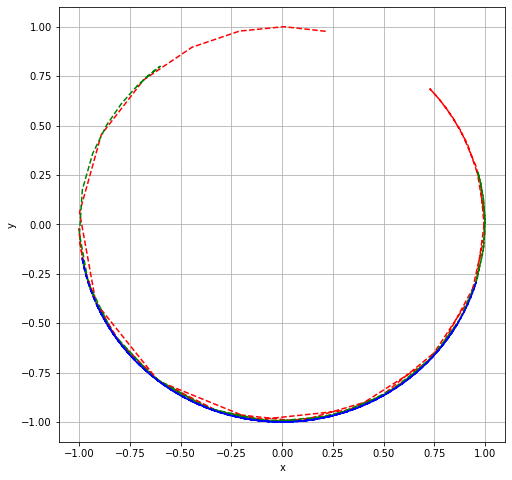

In [1]:
import numpy as np
import scipy as sp
from scipy import constants as cnst
import matplotlib.pyplot as plt
g=9.81
L=1
omega = np.sqrt(g/L)
N=200
N1=70
N2=50
T=4*np.pi/omega
delta = T/N
delta1 = T/N1
delta2 = T/N2
itheta=np.pi/3

plt.figure(figsize = (8,8))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

theta=np.zeros(N+1)
thetadot=np.zeros(N+1)
thetaddot=np.zeros(N+1)
theta[0] = itheta
thetadot[0]=0
for i in range (N):
    thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
    theta[i+1]=theta[i] + thetadot[i]*delta
    thetadot[i+1]=thetadot[i] + thetaddot[i]*delta

theta1=np.zeros(N1+1)
thetadot1=np.zeros(N1+1)
thetaddot1=np.zeros(N1+1)
theta1[0] = itheta
thetadot1[0]=0
for i in range (N1):
    thetaddot1[i]= -1 * omega**2 * np.sin(theta1[i])
    theta1[i+1]=theta1[i] + thetadot1[i]*delta1
    thetadot1[i+1]=thetadot1[i] + thetaddot1[i]*delta1

theta2=np.zeros(N2+1)
thetadot2=np.zeros(N2+1)
thetaddot2=np.zeros(N2+1)
theta2[0] = itheta
thetadot2[0]=0
for i in range (N2):
    thetaddot2[i]= -1 * omega**2 * np.sin(theta2[i])
    theta2[i+1]=theta2[i] + thetadot2[i]*delta2
    thetadot2[i+1]=thetadot2[i] + thetaddot2[i]*delta2

plt.plot(np.cos(theta2+1.5*np.pi),np.sin(theta2+1.5*np.pi),'r--')
plt.plot(np.cos(theta1+1.5*np.pi),np.sin(theta1+1.5*np.pi), 'g--')
plt.plot(np.cos(theta+1.5*np.pi),np.sin(theta+1.5*np.pi),'b--')

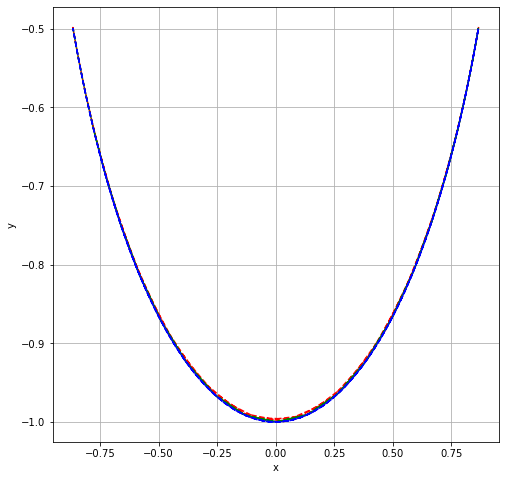

In [110]:
import numpy as np
import scipy as sp
from scipy import constants as cnst
import matplotlib.pyplot as plt
g=9.81
L=1
omega = np.sqrt(g/L)
N=200
N1=70
N2=50
T=3*np.pi/omega
delta = T/N
delta1 = T/N1
delta2 = T/N2
itheta=np.pi/3

plt.figure(figsize = (8,8))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

theta=np.zeros(N+1)
thetadot=np.zeros(N+1)
thetaddot=np.zeros(N+1)
theta[0] = itheta
thetadot[0]=0
for i in range (N):
    thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
    thetadot[i+1]=thetadot[i] + thetaddot[i]*delta
    theta[i+1]=theta[i] + thetadot[i+1]*delta

theta1=np.zeros(N1+1)
thetadot1=np.zeros(N1+1)
thetaddot1=np.zeros(N1+1)
theta1[0] = itheta
thetadot1[0]=0
for i in range (N1):
    thetaddot1[i]= -1 * omega**2 * np.sin(theta1[i])
    thetadot1[i+1]=thetadot1[i] + thetaddot1[i]*delta1
    theta1[i+1]=theta1[i] + thetadot1[i+1]*delta1

theta2=np.zeros(N2+1)
thetadot2=np.zeros(N2+1)
thetaddot2=np.zeros(N2+1)
theta2[0] = itheta
thetadot[0]=0
for i in range (N2):
    thetaddot2[i]= -1 * omega**2 * np.sin(theta2[i])
    thetadot2[i+1]=thetadot2[i] + thetaddot2[i]*delta2
    theta2[i+1]=theta2[i] + thetadot2[i+1]*delta2

plt.plot(np.cos(theta2+1.5*np.pi),np.sin(theta2+1.5*np.pi),'r--')
plt.plot(np.cos(theta1+1.5*np.pi),np.sin(theta1+1.5*np.pi), 'g--')
plt.plot(np.cos(theta+1.5*np.pi),np.sin(theta+1.5*np.pi),'b--')

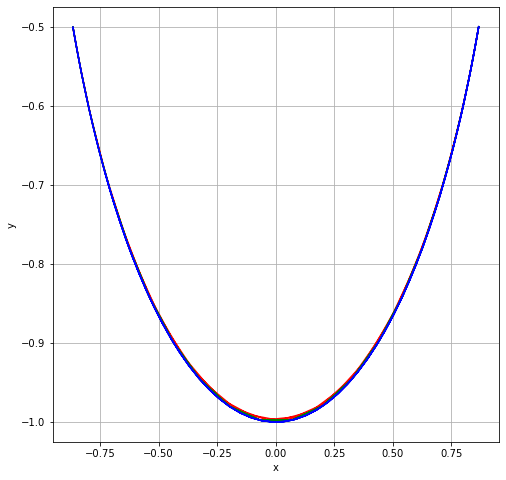

In [3]:
import numpy as np
import scipy as sp
from scipy import constants as cnst
import matplotlib.pyplot as plt
g=9.81
L=1
omega = np.sqrt(g/L)
N=200
N1=70
N2=50
T=3*np.pi/omega
delta = T/N
delta1 = T/N1
delta2 = T/N2
itheta=np.pi/3



plt.figure(figsize = (8,8))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

theta=np.zeros(N)
thetadot=np.zeros(N)
thetaddot=np.zeros(N)
theta[0] = itheta
thetadot[0]=0
for i in range (N-1):
    thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
    thetadot[i+1]=thetadot[i] + thetaddot[i]*0.5*delta
    theta[i+1]=theta[i] + thetadot[i+1]*delta
    thetaddot[i+1]=-1 * omega**2 * np.sin(theta[i+1])
    thetadot[i+1]=thetadot[i+1]+thetaddot[i+1]*0.5*delta

theta1=np.zeros(N1)
thetadot1=np.zeros(N1)
thetaddot1=np.zeros(N1)
theta1[0] = itheta
thetadot1[0]=0
for i in range (N1-1):
    thetaddot1[i]= -1 * omega**2 * np.sin(theta1[i])
    thetadot1[i+1]=thetadot1[i] + thetaddot1[i]*0.5*delta1
    theta1[i+1]=theta1[i] + thetadot1[i+1]*delta1
    thetaddot1[i+1]=-1 * omega**2 * np.sin(theta1[i+1])
    thetadot1[i+1]=thetadot1[i+1]+thetaddot1[i+1]*0.5*delta1

theta2=np.zeros(N2)
thetadot2=np.zeros(N2)
thetaddot2=np.zeros(N2)
theta2[0] = itheta
thetadot[0]=0
for i in range (N2-1):
    thetaddot2[i]= -1 * omega**2 * np.sin(theta2[i])
    thetadot2[i+1]=thetadot2[i] + thetaddot2[i]*0.5*delta2
    theta2[i+1]=theta2[i] + thetadot2[i+1]*delta2
    thetaddot2[i+1]=-1 * omega**2 * np.sin(theta2[i+1])
    thetadot2[i+1]=thetadot2[i+1]+thetaddot2[i+1]*0.5*delta2
    
plt.plot(np.cos(theta2+1.5*np.pi),np.sin(theta2+1.5*np.pi),'r-')
plt.plot(np.cos(theta1+1.5*np.pi),np.sin(theta1+1.5*np.pi), 'g-')
plt.plot(np.cos(theta+1.5*np.pi),np.sin(theta+1.5*np.pi),'b-')






## Task: Fidelity and Accuracy
For this task, we assume $\dot{\theta}(0)=0$. You should show the result for $\theta(0)=2\pi/3$ and some other $\theta(0)$ of your choice.

* For each of the method, plot the pendulum trajectory $\theta(t)$ for time step $\delta=0.1$, $0.01$, and $0.001$. Zoom in on the curve at $t=1$ and visually compare the values from the three time stpes. 
* Does it appear that the trajectory if converging as $\delta\rightarrow 0$.
* What order cumulative accuracy do you find: is each curve better by a factor of 10, 10, 1000, ...?
* Use `numpy.logspace` to create an array of $\delta$ then plot $\theta(t=1)$ as a function of $\delta$ or $1/\delta$. Describe what you observe.

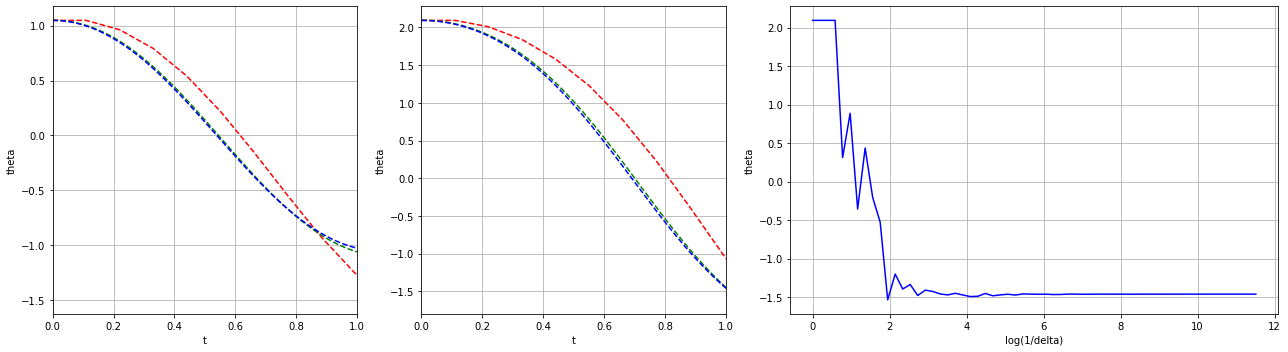

In [128]:
import math
N=1000
N1=100
N2=10
T=1
delta = T/N
delta1 = T/N1
delta2 = T/N2

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (18,5),gridspec_kw={'width_ratios':[5,5,8]})
for j in range (2):
    axes[j].set_xlabel('t')
    axes[j].set_xlim([0,1])
    axes[j].set_ylabel('theta')
    axes[j].grid()
    itheta=(j+1)*np.pi/3
    theta=np.zeros(N+1)
    thetadot=np.zeros(N+1)
    thetaddot=np.zeros(N+1)
    theta[0] = itheta
    thetadot[0]=0
    for i in range (N):
        thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
        theta[i+1]=theta[i] + thetadot[i]*delta
        thetadot[i+1]=thetadot[i] + thetaddot[i]*delta

    theta1=np.zeros(N1+1)
    thetadot1=np.zeros(N1+1)
    thetaddot1=np.zeros(N1+1)
    theta1[0] = itheta
    thetadot1[0]=0
    for i in range (N1):
        thetaddot1[i]= -1 * omega**2 * np.sin(theta1[i])
        theta1[i+1]=theta1[i] + thetadot1[i]*delta1
        thetadot1[i+1]=thetadot1[i] + thetaddot1[i]*delta1

    theta2=np.zeros(N2+1)
    thetadot2=np.zeros(N2+1)
    thetaddot2=np.zeros(N2+1)
    theta2[0] = itheta
    thetadot2[0]=0
    for i in range (N2):
        thetaddot2[i]= -1 * omega**2 * np.sin(theta2[i])
        theta2[i+1]=theta2[i] + thetadot2[i]*delta2
        thetadot2[i+1]=thetadot2[i] + thetaddot2[i]*delta2
    t=np.linspace(0,1.1,N2+1)
    axes[j].plot(t,theta2,'r--')
    t=np.linspace(0,1.01,N1+1)
    axes[j].plot(t,theta1, 'g--')
    t=np.linspace(0,1.001,N+1)
    axes[j].plot(t,theta,'b--')

    
div=60    
D=np.logspace(0,5, num=div)
#D = number of divisions
#T = 1 ND=T N=1/D
values=np.zeros(div)

for j in range (div):
    delta=1/D[j]
    A=int(1/delta)
    theta=np.zeros(A+1)
    thetadot=np.zeros(A+1)
    thetaddot=np.zeros(A+1)
    theta[0] = 2*np.pi/3
    thetadot[0]=0
    for i in range (A):
        thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
        theta[i+1]=theta[i] + thetadot[i]*delta
        thetadot[i+1]=thetadot[i] + thetaddot[i]*delta
    values[j]=theta[A]
axes[2].set_xlabel('log(1/delta)')
axes[2].set_ylabel('theta')
axes[2].plot(np.log(D),values,'b')
axes[2].grid()


fig.tight_layout()

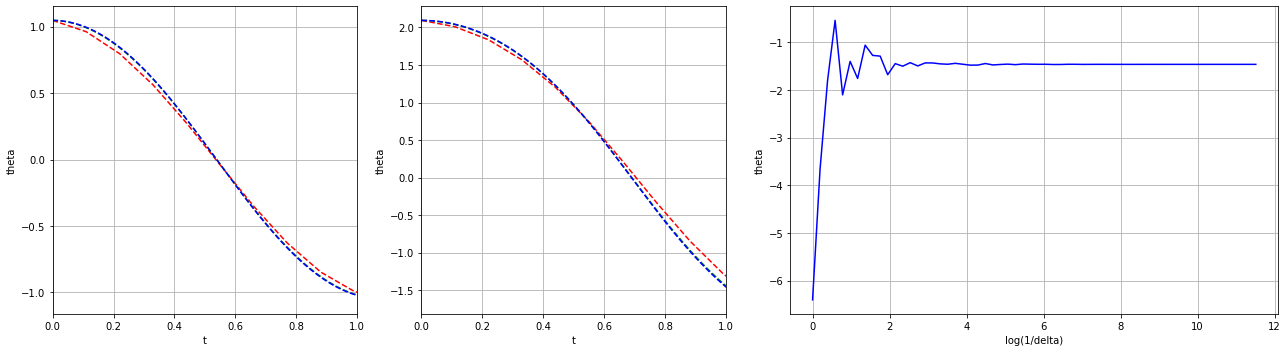

In [124]:
import math
N=1000
N1=100
N2=10
T=1
delta = T/N
delta1 = T/N1
delta2 = T/N2

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (18,5),gridspec_kw={'width_ratios':[5,5,8]})
for j in range (2):
    axes[j].set_xlabel('t')
    axes[j].set_xlim([0,1])
    axes[j].set_ylabel('theta')
    axes[j].grid()
    itheta=(j+1)*np.pi/3
    theta=np.zeros(N+1)
    thetadot=np.zeros(N+1)
    thetaddot=np.zeros(N+1)
    theta[0] = itheta
    thetadot[0]=0
    for i in range (N):
        thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
        thetadot[i+1]=thetadot[i] + thetaddot[i]*delta
        theta[i+1]=theta[i] + thetadot[i+1]*delta
              
    theta1=np.zeros(N1+1)
    thetadot1=np.zeros(N1+1)
    thetaddot1=np.zeros(N1+1)
    theta1[0] = itheta
    thetadot1[0]=0
    for i in range (N1):
        thetaddot1[i]= -1 * omega**2 * np.sin(theta1[i])
        thetadot1[i+1]=thetadot1[i] + thetaddot1[i]*delta1
        theta1[i+1]=theta1[i] + thetadot1[i+1]*delta1

    theta2=np.zeros(N2+1)
    thetadot2=np.zeros(N2+1)
    thetaddot2=np.zeros(N2+1)
    theta2[0] = itheta
    thetadot2[0]=0
    for i in range (N2):
        thetaddot2[i]= -1 * omega**2 * np.sin(theta2[i])
        thetadot2[i+1]=thetadot2[i] + thetaddot2[i]*delta2
        theta2[i+1]=theta2[i] + thetadot2[i+1]*delta2
        
    t=np.linspace(0,1.1,N2+1)
    axes[j].plot(t,theta2,'r--')
    t=np.linspace(0,1.01,N1+1)
    axes[j].plot(t,theta1, 'g--')
    t=np.linspace(0,1.001,N+1)
    axes[j].plot(t,theta,'b--')

    
div=60
T=1
D=np.logspace(0,5, num=div)
#D = number of divisions
#T = 1 ND=T N=1/D
values=np.zeros(div)

for j in range (div):
    delta=1/D[j]
    A=int(T/delta)
    theta=np.zeros(A+1)
    thetadot=np.zeros(A+1)
    thetaddot=np.zeros(A+1)
    theta[0] = 2*np.pi/3
    thetadot[0]=0
    for i in range (A):
        thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
        thetadot[i+1]=thetadot[i] + thetaddot[i]*delta
        theta[i+1]=theta[i] + thetadot[i+1]*delta
    values[j]=theta[A]
axes[2].set_xlabel('log(1/delta)')
axes[2].set_ylabel('theta')
axes[2].plot(np.log(D),values,'b')
axes[2].grid()


fig.tight_layout()

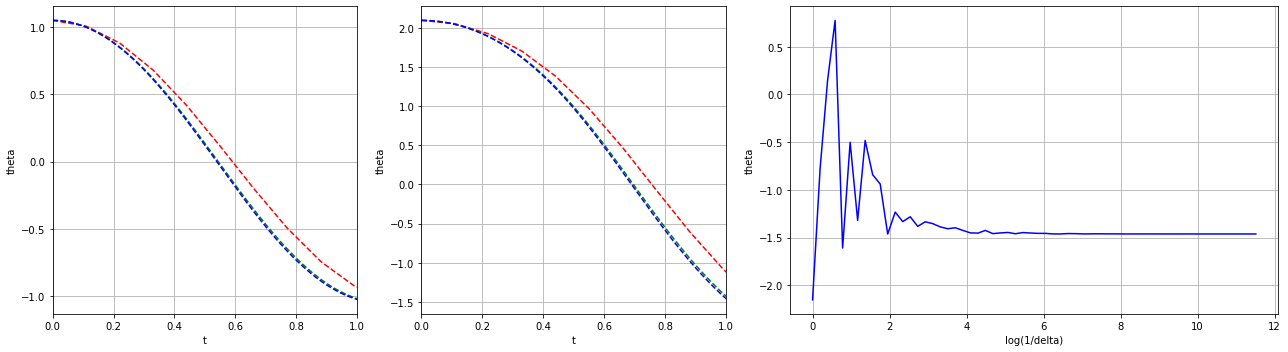

In [123]:
import math
N=1000
N1=100
N2=10
T=1
delta = T/N
delta1 = T/N1
delta2 = T/N2

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (18,5),gridspec_kw={'width_ratios':[5,5,8]})
for j in range (2):
    axes[j].set_xlabel('t')
    axes[j].set_xlim([0,1])
    axes[j].set_ylabel('theta')
    axes[j].grid()
    itheta=(j+1)*np.pi/3
    theta=np.zeros(N+1)
    thetadot=np.zeros(N+1)
    thetaddot=np.zeros(N+1)
    theta[0] = itheta
    thetadot[0]=0
    for i in range (N):
        thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
        thetadot[i+1]=thetadot[i] + thetaddot[i]*0.5*delta
        theta[i+1]=theta[i] + thetadot[i+1]*delta
        thetaddot[i+1]=-1 * omega**2 * np.sin(theta[i+1])
        thetadot[i+1]=thetadot[i+1]+thetaddot[i+1]*0.5*delta
              
    theta1=np.zeros(N1+1)
    thetadot1=np.zeros(N1+1)
    thetaddot1=np.zeros(N1+1)
    theta1[0] = itheta
    thetadot1[0]=0
    for i in range (N1):
        thetaddot1[i]= -1 * omega**2 * np.sin(theta1[i])
        thetadot1[i+1]=thetadot1[i] + thetaddot1[i]*0.5*delta1
        theta1[i+1]=theta1[i] + thetadot1[i+1]*delta1
        thetaddot1[i+1]=-1 * omega**2 * np.sin(theta1[i+1])
        thetadot1[i+1]=thetadot1[i+1]+thetaddot1[i+1]*0.5*delta1

    theta2=np.zeros(N2+1)
    thetadot2=np.zeros(N2+1)
    thetaddot2=np.zeros(N2+1)
    theta2[0] = itheta
    thetadot2[0]=0
    for i in range (N2):
        thetaddot2[i]= -1 * omega**2 * np.sin(theta2[i])
        thetadot2[i+1]=thetadot2[i] + thetaddot2[i]*0.5*delta2
        theta2[i+1]=theta2[i] + thetadot2[i+1]*delta2
        thetaddot2[i+1]=-1 * omega**2 * np.sin(theta2[i+1])
        thetadot2[i+1]=thetadot2[i+1]+thetaddot2[i+1]*0.5*delta2
        
    t=np.linspace(0,1.1,N2+1)
    axes[j].plot(t,theta2,'r--')
    t=np.linspace(0,1.01,N1+1)
    axes[j].plot(t,theta1, 'g--')
    t=np.linspace(0,1.001,N+1)
    axes[j].plot(t,theta,'b--')

    
div=60    
D=np.logspace(0,5, num=div)
#D = number of divisions
#T = 1 ND=T N=1/D
values=np.zeros(div)

for j in range (div):
    delta=1/D[j]
    A=int(1/delta)
    theta=np.zeros(A+1)
    thetadot=np.zeros(A+1)
    thetaddot=np.zeros(A+1)
    theta[0] = 2*np.pi/3
    thetadot[0]=0
    for i in range (A):
        thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
        thetadot[i+1]=thetadot[i] + thetaddot[i]*0.5*delta
        theta[i+1]=theta[i] + thetadot[i+1]*delta
        thetaddot[i+1]=-1 * omega**2 * np.sin(theta[i+1])
        thetadot[i+1]=thetadot[i+1]+thetaddot[i+1]*0.5*delta
    values[j]=theta[A]
axes[2].set_xlabel('log(1/delta)')
axes[2].set_ylabel('theta')
axes[2].plot(np.log(D),values,'b')
axes[2].grid()


fig.tight_layout()

## Task: Stability

For you task, we assume $\theta(0)=0.001$, $\dot{\theta}(0)=0$, and $T=10$. 

* For each of the method, plot the pendulum trajectory $\theta(t)$ for time stpes $\delta=0.1, 0.2, ...., 0.8$. 
* At about what $\delta_c$ does it go unstable?
* How does $\delta_c$ compare with the characteristic time period of the pendulum?
* At $\delta_c/2$, how accurate is the amplitude of the oscillation? (You will need to observe several periods in order to estimate the maximum amplitude of the solution)

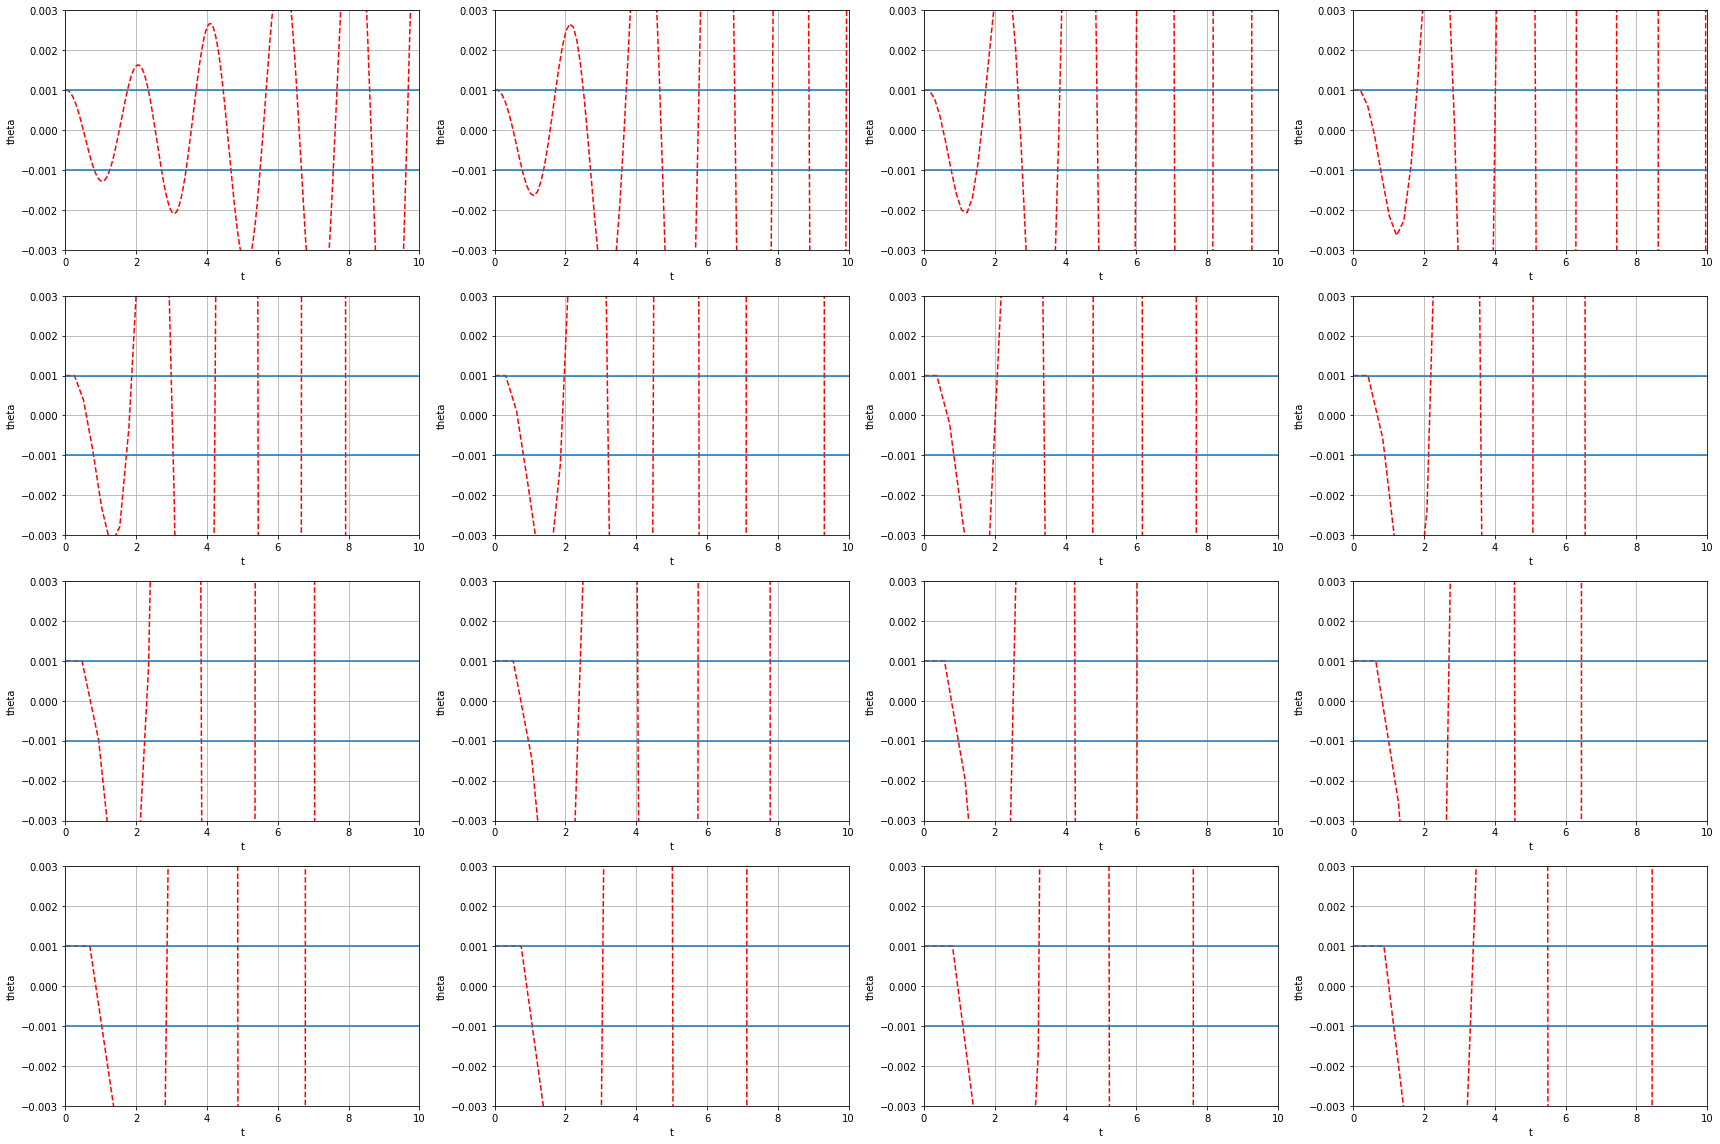

In [86]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize = (24,16))
axes=axes.flatten()
T=10
for j in range (16):
    itheta=0.001
    delta=0.05*(j+1)
    N=int(T//delta)
    theta=np.zeros(N+1)
    thetadot=np.zeros(N+1)
    thetaddot=np.zeros(N+1)
    theta[0] = itheta
    thetadot[0]=0
    for i in range (N):
        thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
        theta[i+1]=theta[i] + thetadot[i]*delta
        thetadot[i+1]=thetadot[i] + thetaddot[i]*delta
        
    t=np.linspace(0,delta*(N+1),N+1)
    axes[j].set_xlabel('t')
    axes[j].set_xlim([0,T])
    axes[j].set_ylim([-0.003,0.003])
    axes[j].set_ylabel('theta')
    axes[j].grid()
    axes[j].plot(t,theta,'r--')
    axes[j].axhline(y=0.001)
    axes[j].axhline(y=-0.001)
    
fig.tight_layout()

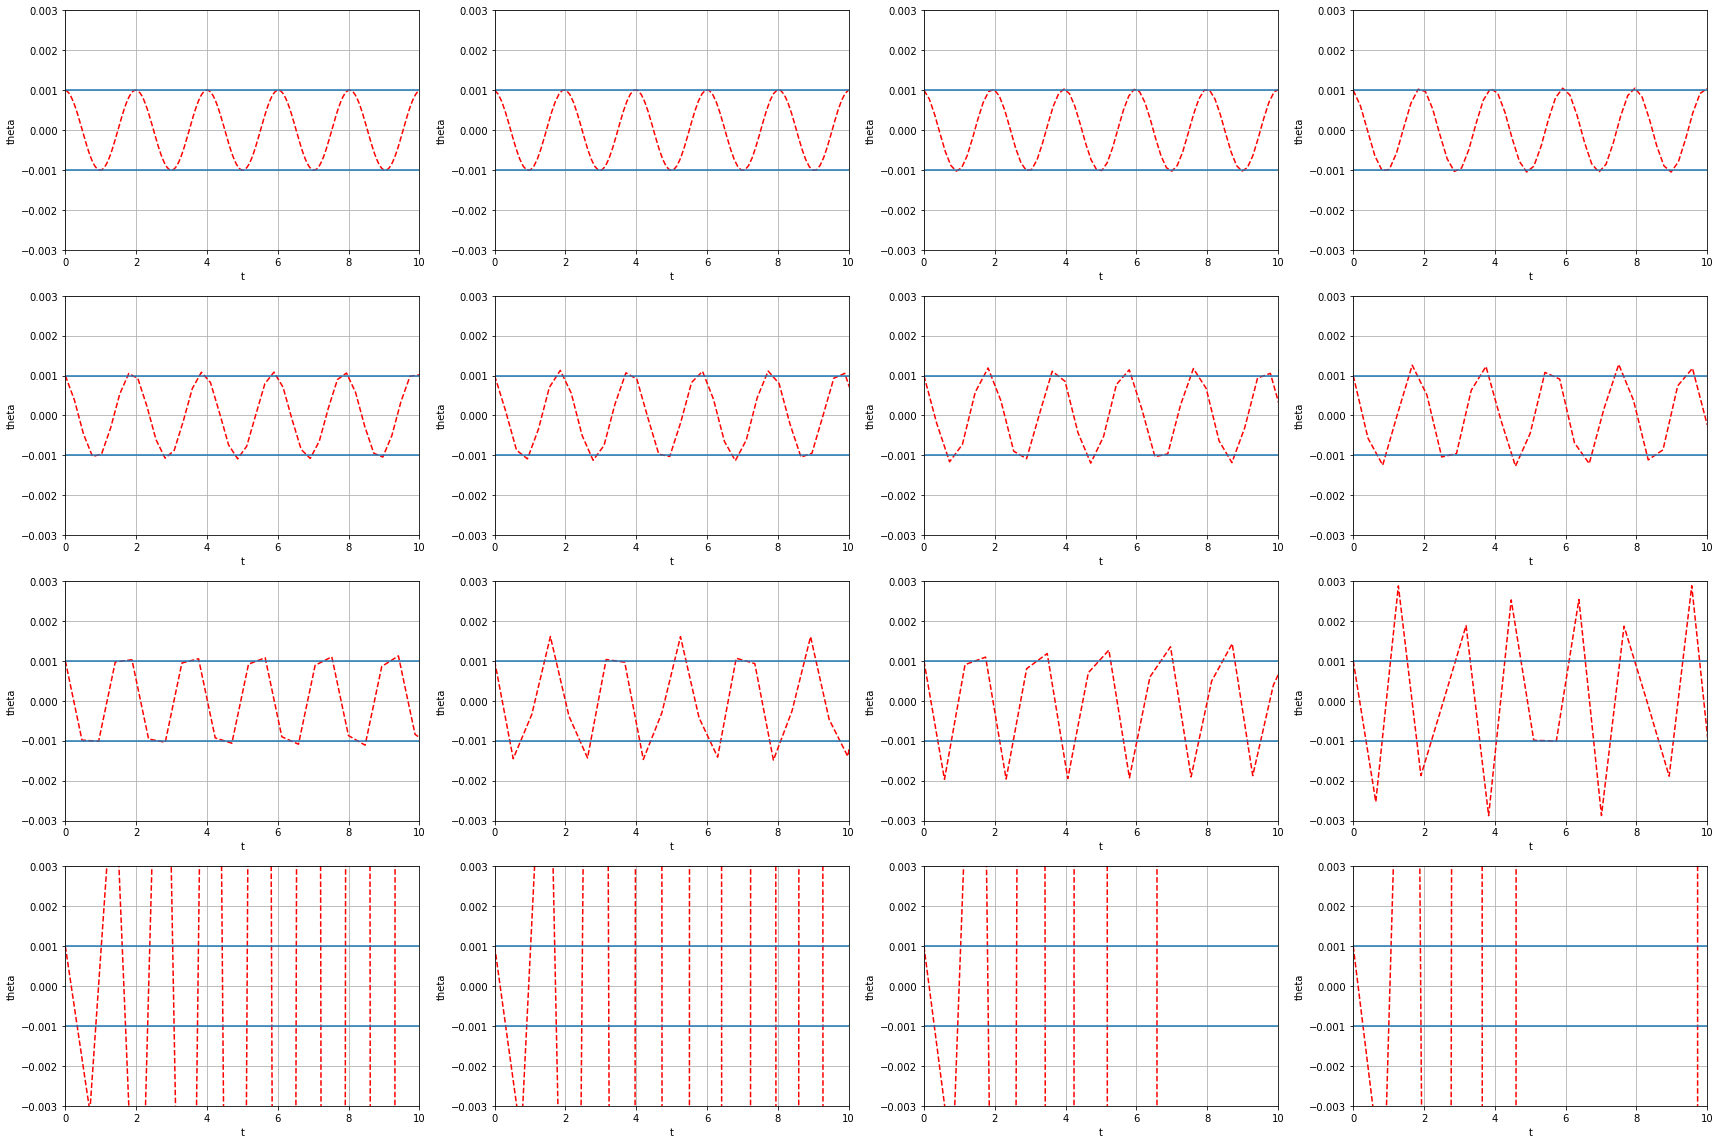

In [96]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize = (24,16))
axes=axes.flatten()
T=10
for j in range (16):
    itheta=0.001
    delta=0.05*(j+1)
    N=int(T//delta)
    theta=np.zeros(N+1)
    thetadot=np.zeros(N+1)
    thetaddot=np.zeros(N+1)
    theta[0] = itheta
    thetadot[0]=0
    for i in range (N):
        thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
        thetadot[i+1]=thetadot[i] + thetaddot[i]*delta
        theta[i+1]=theta[i] + thetadot[i+1]*delta
        
    t=np.linspace(0,delta*(N+1),N+1)
    axes[j].set_xlabel('t')
    axes[j].set_xlim([0,T])
    axes[j].set_ylim([-0.003,0.003])
    axes[j].set_ylabel('theta')
    axes[j].grid()
    axes[j].plot(t,theta,'r--')
    axes[j].axhline(y=0.001)
    axes[j].axhline(y=-0.001)
    
    
fig.tight_layout()

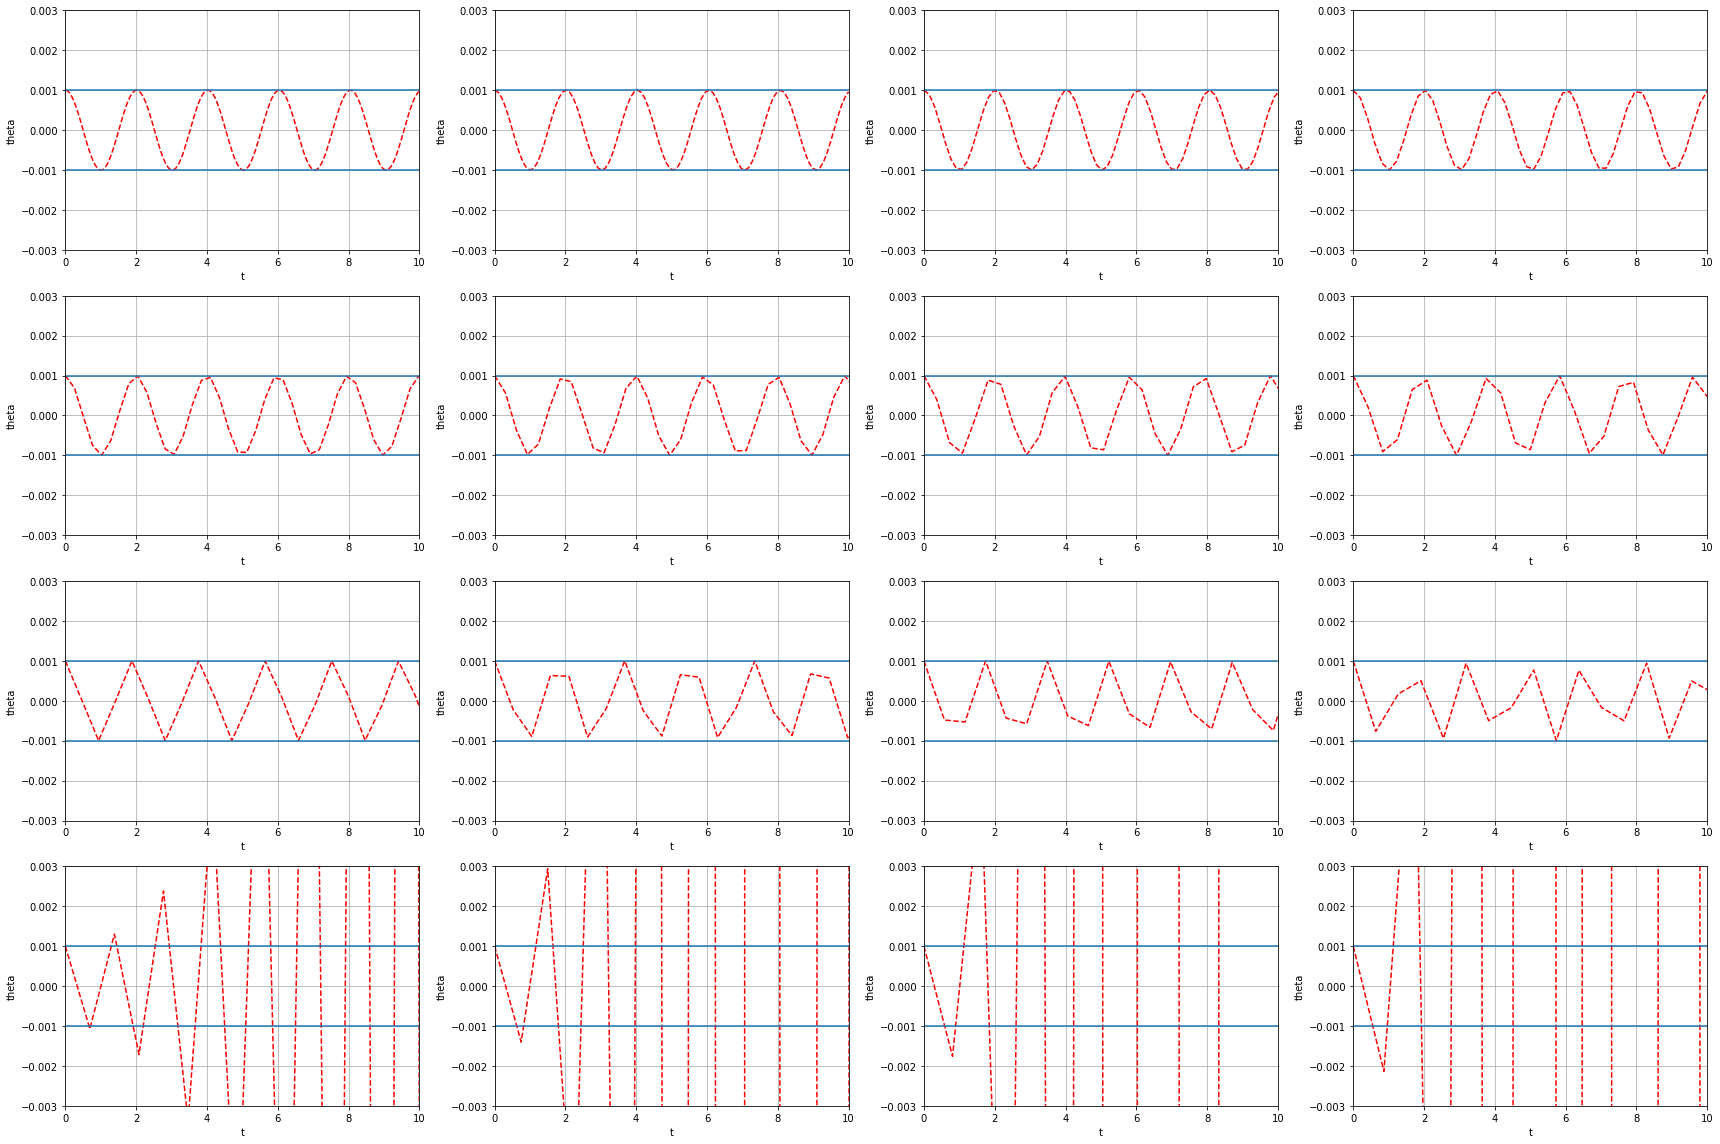

In [100]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize = (24,16))
axes=axes.flatten()
T=10
for j in range (16):
    itheta=0.001
    delta=0.05*(j+1)
    N=int(T//delta)
    theta=np.zeros(N+1)
    thetadot=np.zeros(N+1)
    thetaddot=np.zeros(N+1)
    theta[0] = itheta
    thetadot[0]=0
    for i in range (N):
        thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
        thetadot[i+1]=thetadot[i] + thetaddot[i]*0.5*delta
        theta[i+1]=theta[i] + thetadot[i+1]*delta
        thetaddot[i+1]=-1 * omega**2 * np.sin(theta[i+1])
        thetadot[i+1]=thetadot[i+1]+thetaddot[i+1]*0.5*delta
        
    t=np.linspace(0,delta*(N+1),N+1)
    axes[j].set_xlabel('t')
    axes[j].set_xlim([0,T])
    axes[j].set_ylim([-0.003,0.003])
    axes[j].set_ylabel('theta')
    axes[j].grid()
    axes[j].plot(t,theta,'r--')
    axes[j].axhline(y=0.001)
    axes[j].axhline(y=-0.001)
    
fig.tight_layout()

## Task: Period

* For each of the method, determine the period of the oscillation and compare to the exact result for time steps $\delta=0.1, 0.01, 0.001$.

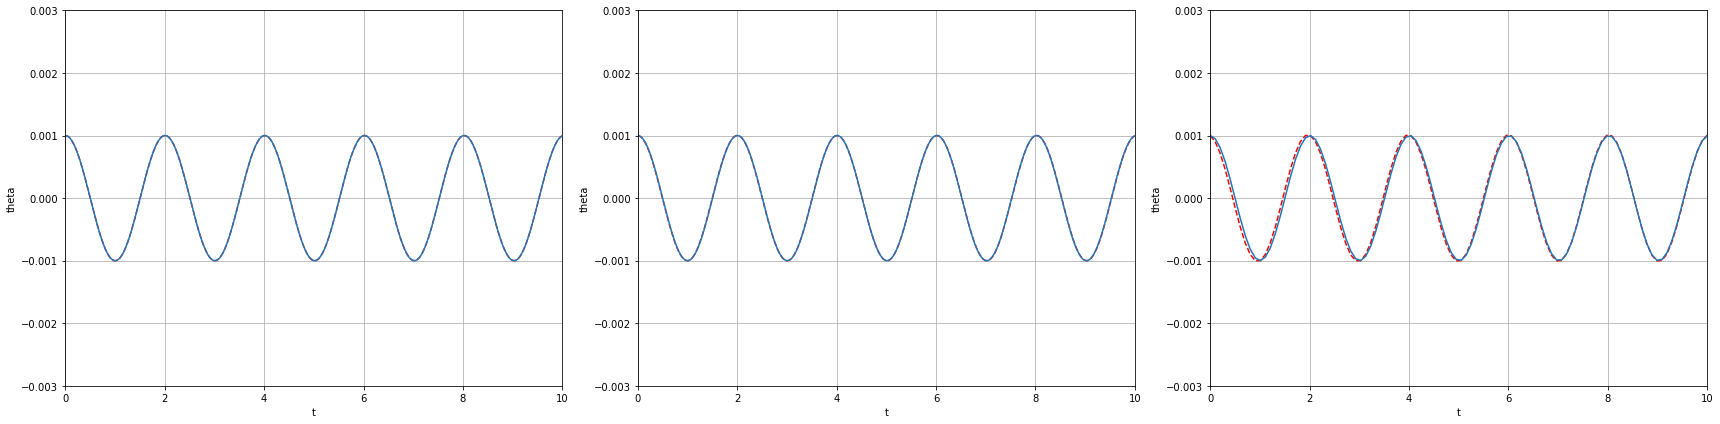

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (24,6))
axes=axes.flatten()
g=9.81
L=1
omega = np.sqrt(g/L)
T=10
for j in range (3):
    itheta=0.001
    delta=10**(j-3)
    N=int(T//delta)
    theta=np.zeros(N+1)
    thetadot=np.zeros(N+1)
    thetaddot=np.zeros(N+1)
    theta[0] = itheta
    thetadot[0]=0
    for i in range (N):
        thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
        thetadot[i+1]=thetadot[i] + thetaddot[i]*delta
        theta[i+1]=theta[i] + thetadot[i+1]*delta
        
    t=np.linspace(0,delta*(N+1),N+1)
    axes[j].set_xlabel('t')
    axes[j].set_xlim([0,T])
    axes[j].set_ylim([-0.003,0.003])
    axes[j].set_ylabel('theta')
    axes[j].grid()
    axes[j].plot(t,theta,'r--')
    axes[j].plot(t,itheta*np.cos(omega*t))
    
    
fig.tight_layout()

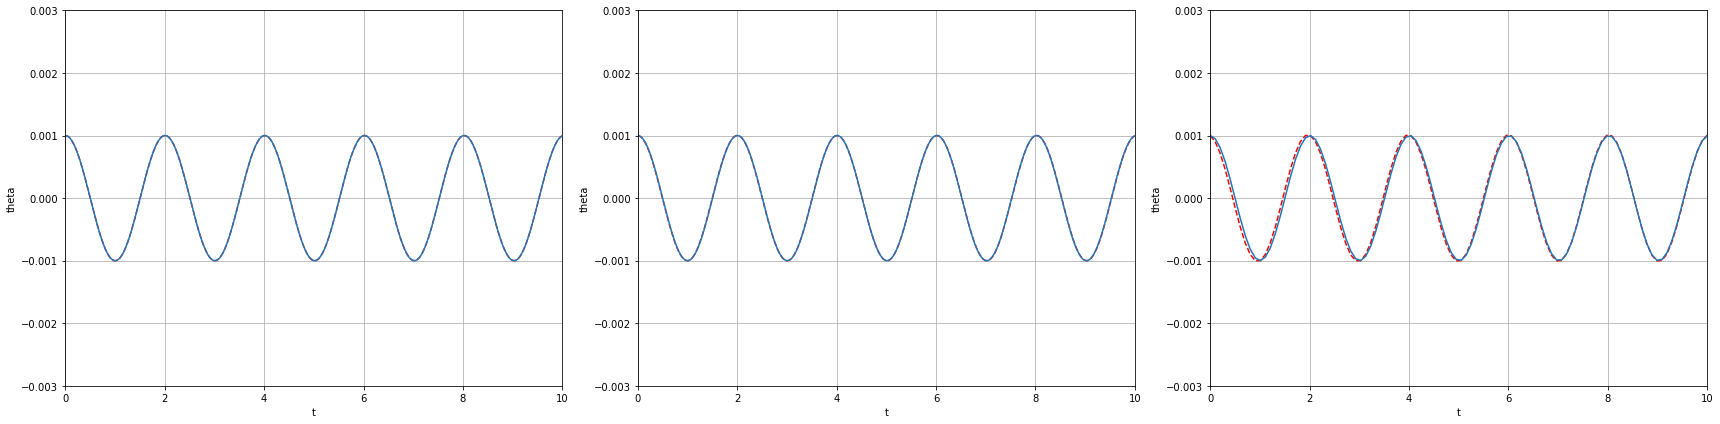

In [105]:
 fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (24,6))
axes=axes.flatten()
g=9.81
L=1
omega = np.sqrt(g/L)
T=10
for j in range (3):
    itheta=0.001
    delta=10**(j-3)
    N=int(T//delta)
    theta=np.zeros(N+1)
    thetadot=np.zeros(N+1)
    thetaddot=np.zeros(N+1)
    theta[0] = itheta
    thetadot[0]=0
    for i in range (N):
        thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
        thetadot[i+1]=thetadot[i] + thetaddot[i]*delta
        theta[i+1]=theta[i] + thetadot[i+1]*delta
        
    t=np.linspace(0,delta*(N+1),N+1)
    axes[j].set_xlabel('t')
    axes[j].set_xlim([0,T])
    axes[j].set_ylim([-0.003,0.003])
    axes[j].set_ylabel('theta')
    axes[j].grid()
    axes[j].plot(t,theta,'r--')
    axes[j].plot(t,itheta*np.cos(omega*t))
    
    
fig.tight_layout()

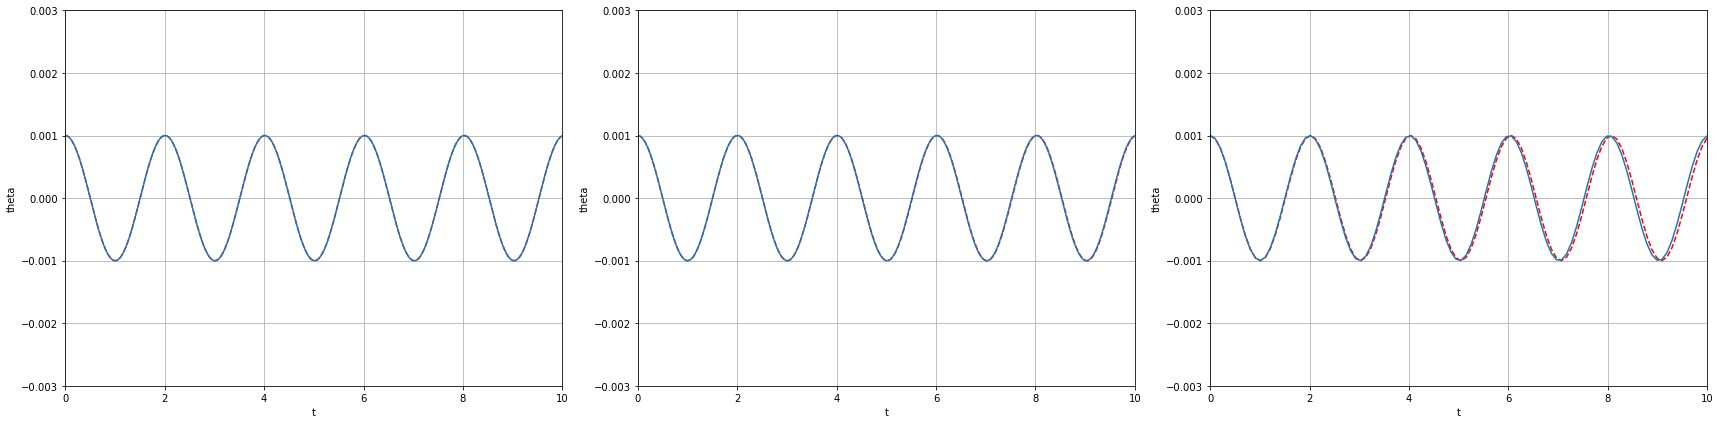

In [95]:
 fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (24,6))
axes=axes.flatten()
g=9.81
L=1
omega = np.sqrt(g/L)
T=10
for j in range (3):
    itheta=0.001
    delta=10**(j-3)
    N=int(T//delta)
    theta=np.zeros(N+1)
    thetadot=np.zeros(N+1)
    thetaddot=np.zeros(N+1)
    theta[0] = itheta
    thetadot[0]=0
    for i in range (N):
        thetaddot[i]= -1 * omega**2 * np.sin(theta[i])
        thetadot[i+1]=thetadot[i] + thetaddot[i]*0.5*delta
        theta[i+1]=theta[i] + thetadot[i+1]*delta
        thetaddot[i+1]=-1 * omega**2 * np.sin(theta[i+1])
        thetadot[i+1]=thetadot[i+1]+thetaddot[i+1]*0.5*delta
        
    t=np.linspace(0,delta*(N+1),N+1)
    axes[j].set_xlabel('t')
    axes[j].set_xlim([0,T])
    axes[j].set_ylim([-0.003,0.003])
    axes[j].set_ylabel('theta')
    axes[j].grid()
    axes[j].plot(t,theta,'r--')
    axes[j].plot(t,itheta*np.cos(omega*t))
    
    
fig.tight_layout()